In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/15 Tribal Shuffle 123BPM
  01 12th Hat.mid
  02 4th Hat.mid
  03 8th Toms.mid
  04 8th Cym.mid
  05 6th Hat.mid
  06 6th Hat.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/16 Medium Flow 120BPM
  01 16th Hat.mid
  02 16th Cym.mid
  03 8th Hat.mid
  04 16th Perc.mid
  05 16th Perc.mid
  06 16th Hat.mid
  07 16th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/17 Relaxed 88BPM
  01 16th Hat.mid
  02 16th Hat.mid
  03 4th Hat.mid
  04 16th Hat.mid
  05 16th Cym.mid
  06 16th Toms.mid
  07 16th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/18 Disco Weirdo 146BPM
  01 4th Hat.mid
  02 8th Hat.mid
  03 8th Cym.mid
  04 16th Toms.mid
  05 16th Toms.mid
  06 8th Hat.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/19 Distant Floor 119BPM
  01 4th Multi.mid
  02 16th Multi.mid
  03 4th Multi.mid
  04 4th Multi.mid
  05 8th Multi.


Encoding midi-data
 1000
> -> multi-track = True none
 [INFO] : 
 |  True


In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '01 Dancin Rick 166BPM']

In [9]:
dn = config.dataset_dir + 'drum_midi/' + '50´s Drummer MIDI Files'
# for a in os.walk(config.dataset_dir + 'drum_midi'):
#     print(a)
sorted(os.listdir(dn))

['.DS_Store',
 "01 Rock'n'Roll",
 '02 Blues',
 '03 Traditional Pop',
 '04 Country',
 '05 Jazz',
 '06 Soul - Funk',
 '07 Indie']

In [10]:
unique_genres = set(genre[-2] +'/'+ genre[-1] for genre in genres)
len(unique_genres)

110

In [11]:
unique_genres

{'01 Rock n Roll/01 Shuffle 186BPM',
 '01 Rock n Roll/02 Straight 150BPM',
 '01 Rock n Roll/03 Chucky 140BPM',
 '01 Rock n Roll/04 Deddley 150BPM',
 '01 Rock n Roll/05 Diamond 164BPM',
 '01 Rock n Roll/06 Swingin 132BPM Triplets',
 '01 Rock n Roll/07 Domino 167BPM',
 '01 Rock n Roll/08 Offkick 182BPM',
 '01 Rock n Roll/09 Rumblin 192BPM Triplets',
 '01 Rock n Roll/10 Uptime 112BPM',
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM",
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 "01 Rock'n'Roll/04 Maybelline 233BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/07 Thwag 170BPM",
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '02 Blues Rock/01 Clutch 90BPM Triplets',
 '02 Blues Rock/02 Sixeight 58BPM',
 '02 Blues Rock/03 Fire 148BPM',
 '02 Blues Rock/04 Whiteroom 112BPM',
 '02 Blues Rock/05 Bluesshuffle 116BPM',
 '02 Blues Rock/06 Straight 130BPM',
 '02

In [12]:
x_train.shape

(1000, 160, 10, 1)

In [13]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [14]:
x_test = x_train[m:]
x_train = x_train[:m]

In [15]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [16]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [17]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [18]:
latent_dim = 10
epsilon_std = 1.0

In [51]:
# utils.reload(models)
vae, encoder, generator = models.build(input_shape, latent_dim, epsilon_std)

/usr/local/lib/python3.6/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `[(None, 10), (None, 10)]` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/Users/mark/src/pattern-recognition/src/models.py:147: UserWarning: Output "decoder_model-" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder_model-" during training.
  vae.compile(optimizer='adam')


In [21]:
# vae.to_json()

In [22]:
# vae, encoder, generator = models.build(input_shape, latent_dim)

In [26]:
batch_size = 128
epochs = 100
params = {'batch_size': batch_size, 'return_y': False}

In [27]:
# phase_mod = 0.01
# whitening = False

In [28]:
m = 100
useDataGenerator = False
# useDataGenerator = True
callbacks = []
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

x = x_train[:m]
# x = x_train
# i = [0,1, 7,8, 14,15, 399,400]
# x = x_train[i]
# x = np.concatenate([x for _ in range(10)])
print('x:', x.shape)

print('batch_size: %i' % batch_size)
print('update-iterations:', round(epochs * x.shape[0] / batch_size))
if useDataGenerator:
    datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
    history = collections.defaultdict(list)
    n_batches = datagen.__len__()
    for e in range(epochs):
        print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
        for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
            print(' Batch %i/%i' % (batch_i,n_batches))
            x_ = x_batch
            # x_ = datagen.shuffle_3rd_dim(x_)
            # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
            h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
            for k,v in h.history.items(): 
                print(' \\_%s' % k, [round(v_,) for v_ in v])
                history[k].append(v)
            if batch_i >= n_batches:
                break
else:
    h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
    history = h.history

/usr/local/lib/python3.6/site-packages/keras/callbacks.py:694: UserWarning: You are not using the TensorFlow backend. write_graph was set to False
  warnings.warn('You are not using the TensorFlow backend. '


x: (100, 160, 10, 1)
batch_size: 128
update-iterations: 78
Train on 100 samples, validate on 100 samples
Epoch 1/100
100/100 [==============================] - 4s 36ms/step - loss: 143.9572 - val_loss: 83.7740
Epoch 2/100
100/100 [==============================] - 4s 36ms/step - loss: 137.5800 - val_loss: 85.0164
Epoch 3/100
100/100 [==============================] - 4s 38ms/step - loss: 131.4653 - val_loss: 86.3365
Epoch 4/100
100/100 [==============================] - 4s 36ms/step - loss: 128.0306 - val_loss: 86.2957
Epoch 5/100
100/100 [==============================] - 4s 38ms/step - loss: 125.1885 - val_loss: 86.5332
Epoch 6/100
100/100 [==============================] - 4s 39ms/step - loss: 123.5791 - val_loss: 86.3783
Epoch 7/100
100/100 [==============================] - 4s 40ms/step - loss: 123.8418 - val_loss: 84.4389
Epoch 8/100
100/100 [==============================] - 4s 40ms/step - loss: 122.7558 - val_loss: 85.7148
Epoch 9/100
100/100 [==============================] - 

100/100 [==============================] - 4s 37ms/step - loss: 114.5721 - val_loss: 80.9611
Epoch 78/100
100/100 [==============================] - 4s 37ms/step - loss: 114.5681 - val_loss: 82.2076
Epoch 79/100
100/100 [==============================] - 4s 43ms/step - loss: 114.5007 - val_loss: 83.8270
Epoch 80/100
100/100 [==============================] - 4s 45ms/step - loss: 115.3313 - val_loss: 81.3541
Epoch 81/100
100/100 [==============================] - 5s 50ms/step - loss: 114.0411 - val_loss: 80.2389
Epoch 82/100
100/100 [==============================] - 4s 37ms/step - loss: 114.4253 - val_loss: 81.6730
Epoch 83/100
100/100 [==============================] - 4s 38ms/step - loss: 114.7494 - val_loss: 81.8262
Epoch 84/100
100/100 [==============================] - 4s 37ms/step - loss: 113.9845 - val_loss: 83.0973
Epoch 85/100
100/100 [==============================] - 4s 37ms/step - loss: 114.0378 - val_loss: 82.5921
Epoch 86/100
100/100 [==============================] - 4s 

In [29]:
# name = 'hi_res-v3p-4_vae.h5'
# name = 'hi_res2c_vae.h5'
name = 'non-functional_model.h5'
fn = config.model_dir + name

In [56]:
io.save_dict('../logs/','train_loss-' + name, history)

'../logs/train_loss-non-functional_model.h5.csv'

In [31]:
# vae.save_weights(fn, "w")

In [43]:
vae.save(fn)

In [53]:
vae.load_weights(fn)

In [ ]:
# vae.load_weights(fn)

In [49]:
# model = keras.models.load_model(fn + '__save')

In [34]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylim(0,150)

m (50, 10, 1)


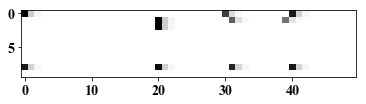

m (50, 10, 1)


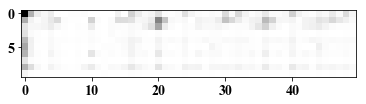

m (50, 10, 1)


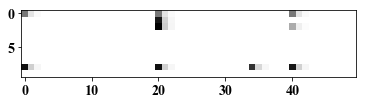

m (50, 10, 1)


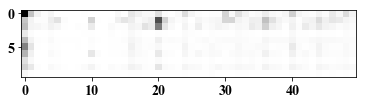

In [54]:
i,j = 240, 30
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

m (40, 10, 1)


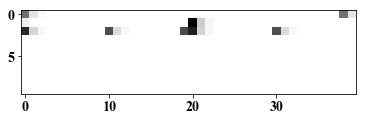

m (40, 10, 1)


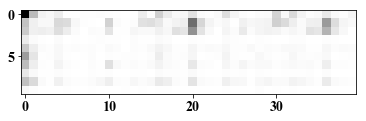

In [55]:
x_ = generator.predict(encoder.predict(x_train[:10]))
plot.single(x_train[0,:40])
plot.single(x_[0,:40])

m (50, 10, 1)


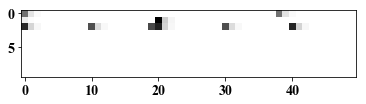

m (50, 10, 1)


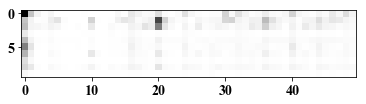

m (50, 10, 1)


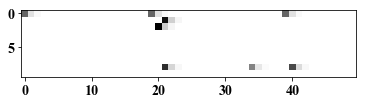

m (50, 10, 1)


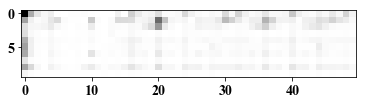

In [37]:
i,j = 0, 10

m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [38]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [39]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [40]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [41]:
# # build a model to project inputs on the latent space
# encoder = Model(encoder_input, z_mean)

In [42]:
# generator_input = Input((latent_dim,))
# generator_layers_ = utils.composition(decoders, generator_input)
# generator = Model(generator_input, generator_layers_)

In [ ]:
decoder = generator

## Style transfer

In [ ]:
import sklearn.feature_selection
import sklearn.ensemble

In [ ]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [ ]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

In [ ]:
# a = list({3:[2],'s':[3,3]}.keys())
# np.random.shuffle(a)
# a

In [ ]:
import transformation_extraction

In [ ]:
d = {'a':3, 'b':2}
dd = np.array(list(d.keys()))

In [ ]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt1=1000, amt2=1, v=1)

In [ ]:
print('avg importance: %f' % np.mean(importances))

In [ ]:
# list(min_transformations.items())[0]

In [ ]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  

In [ ]:
plt.hist(best_dims)

In [ ]:
# TODO save as python object (or json)

In [ ]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations-best_dims.pkl'
io.save(best_dims, fn)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

In [ ]:
t_ = io.load(fn)

In [ ]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [ ]:
list(transformations.keys())[:3]

In [ ]:
len(transformations.keys())